In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
os.chdir("..")

In [3]:
data = pd.read_csv('src/diabetes2.csv')

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Figure size 1200x800 with 0 Axes>

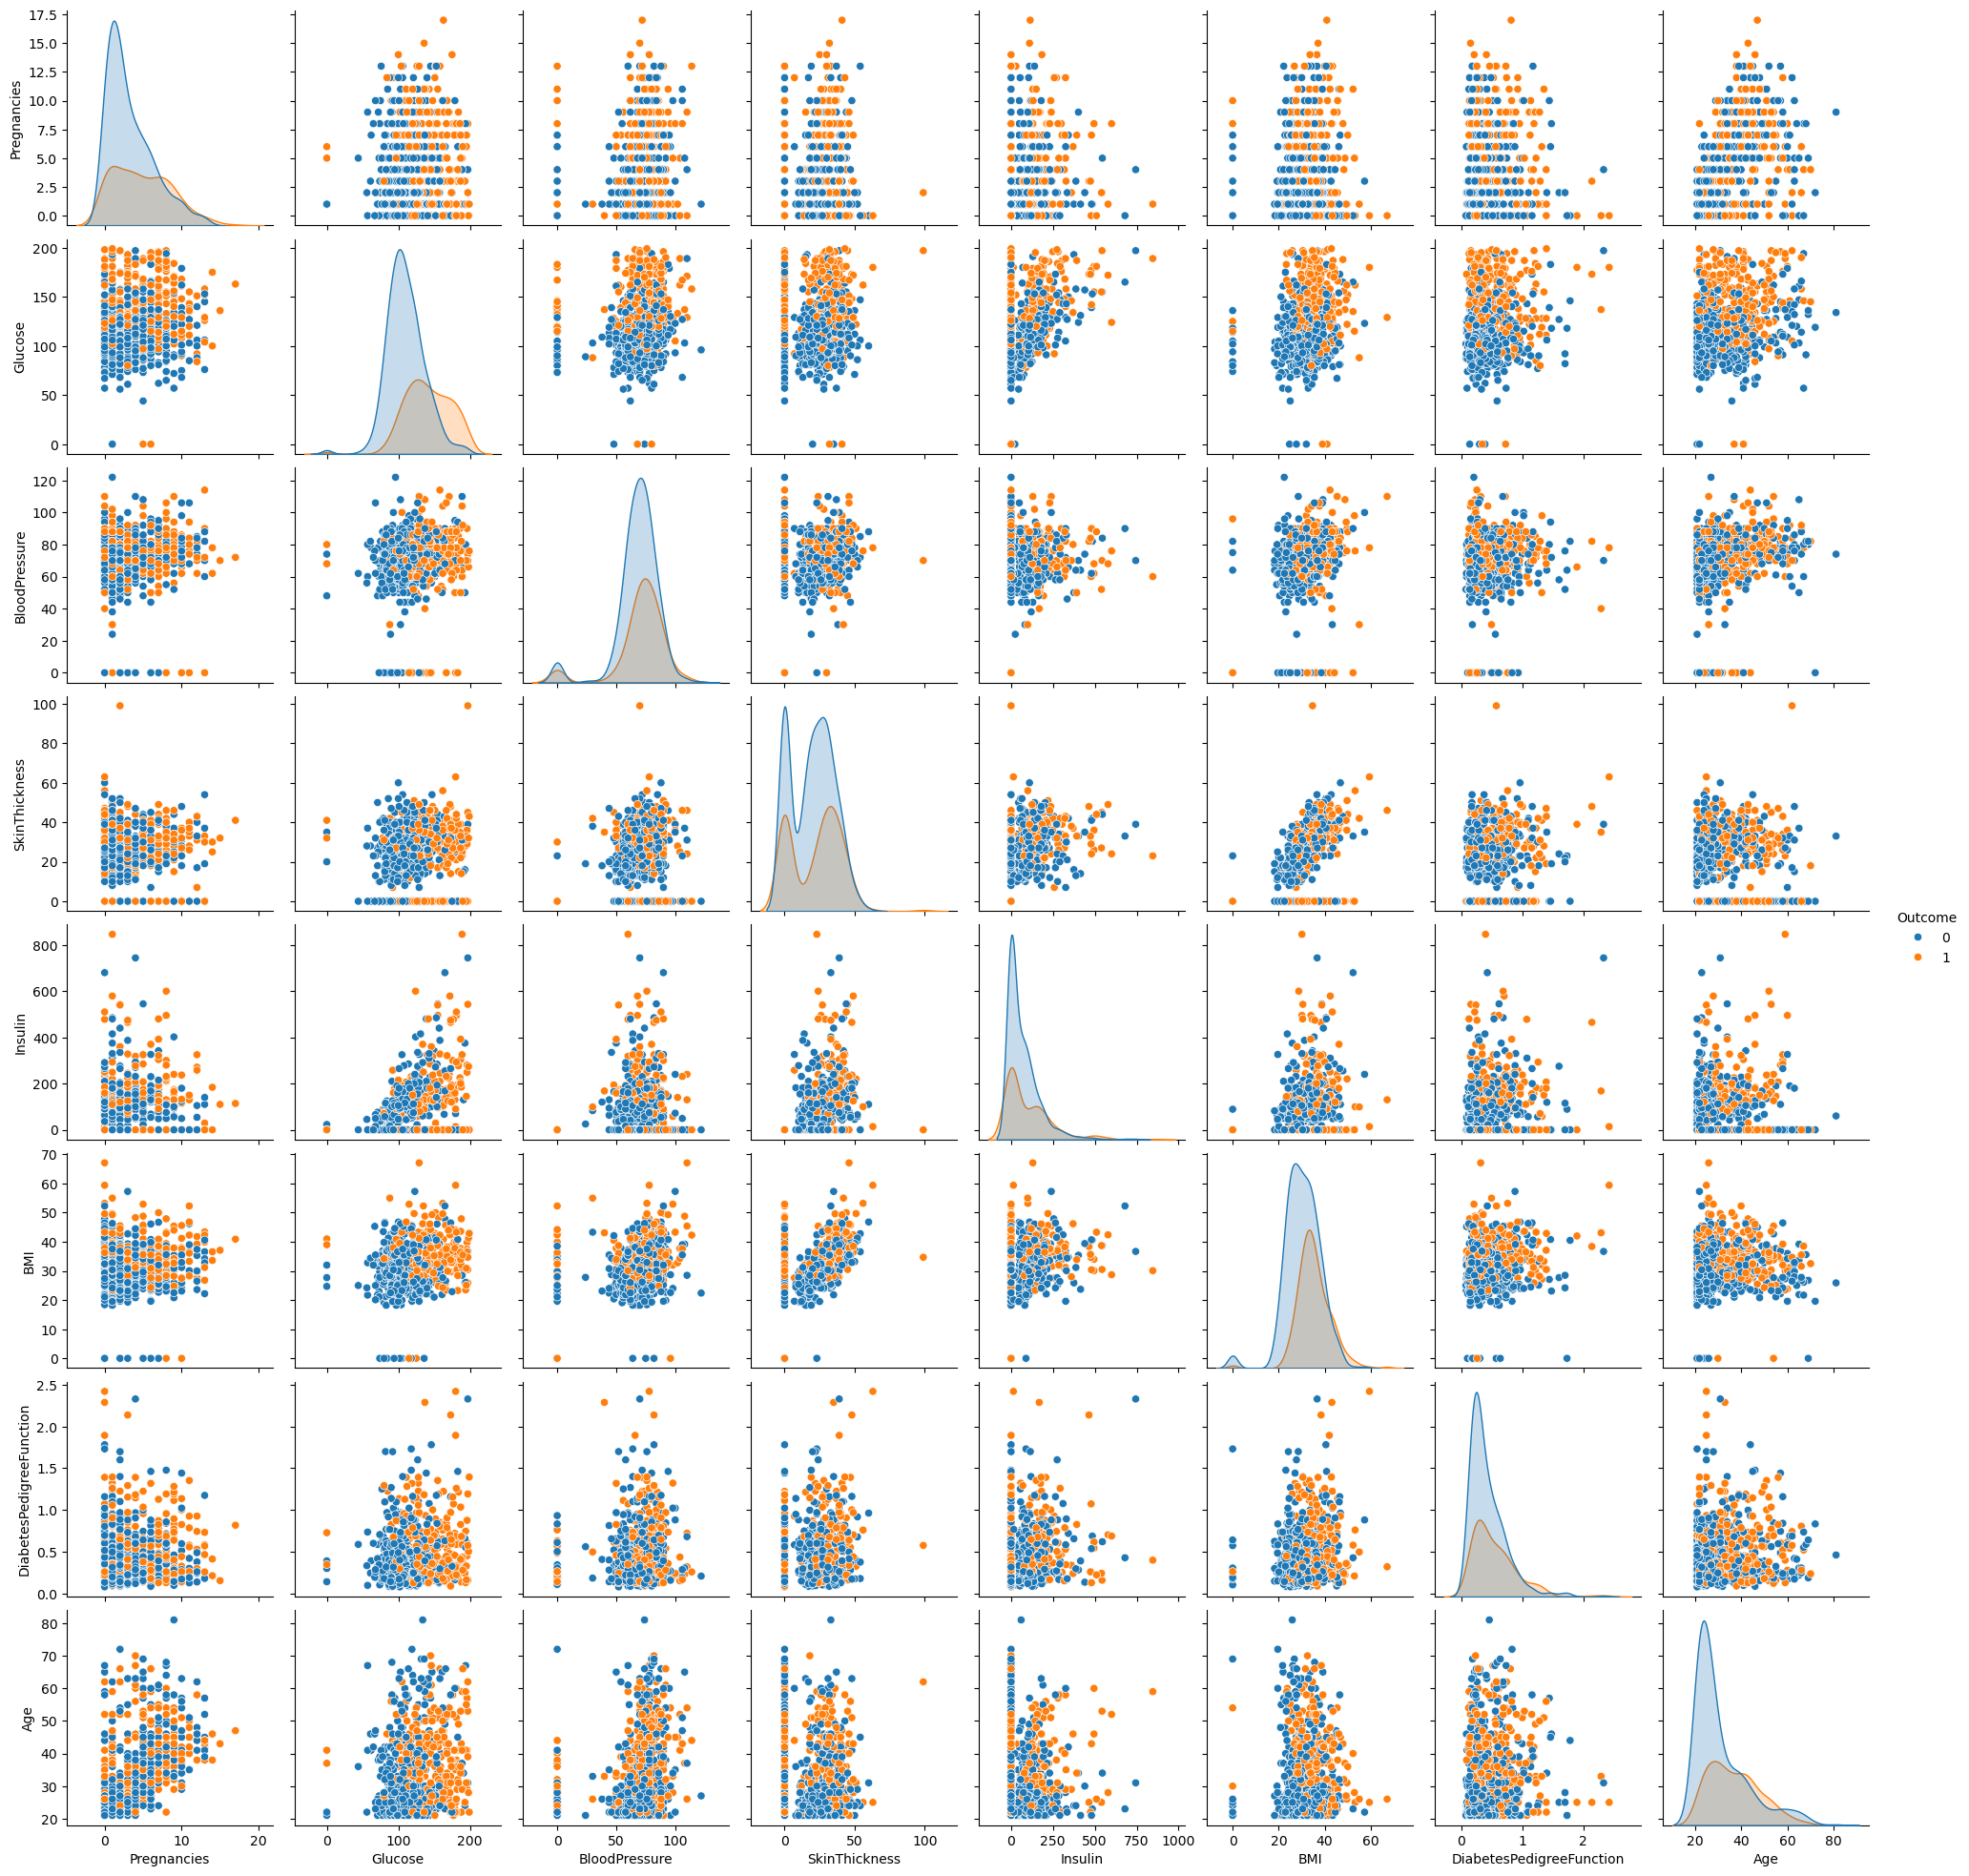

In [9]:
plt.figure(figsize=(12,8))
sns.pairplot(data=data, hue='Outcome')

In [10]:
dat_corr = data.corr()

<Axes: >

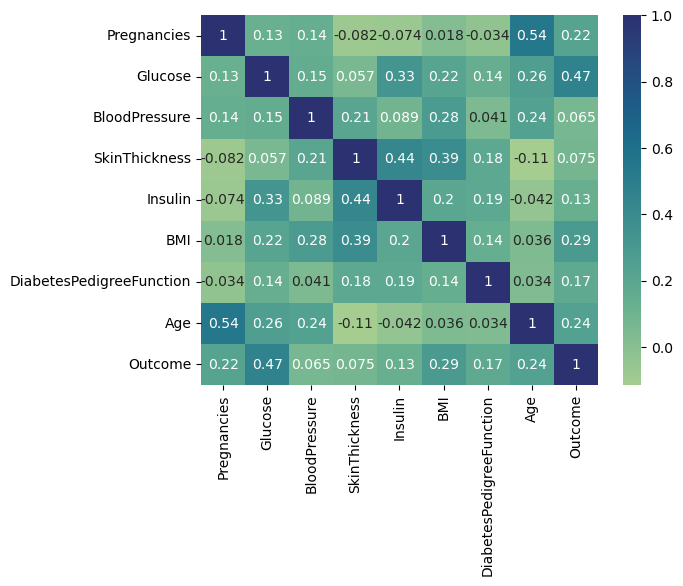

In [11]:
sns.heatmap(dat_corr, annot=True, cbar=True, xticklabels='auto', cmap='crest')

In [12]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [13]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [14]:
from imblearn.over_sampling import RandomOverSampler
rsp=RandomOverSampler()
x_rsp,y_rsp=rsp.fit_resample(X,y)
print(x_rsp.shape)
print(y_rsp.shape)

(1000, 8)
(1000,)


In [15]:
X = x_rsp
y = y_rsp

In [16]:
y.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [17]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
995,8,154,78,32,0,32.4,0.443,45
996,3,129,92,49,155,36.4,0.968,32
997,0,162,76,56,100,53.2,0.759,25
998,0,137,40,35,168,43.1,2.288,33


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123, test_size=0.25)

In [20]:
cols = list(X_train.columns)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
SS  = StandardScaler()

In [23]:
X_train = SS.fit_transform(X_train[cols])

In [24]:
X_test = SS.transform(X_test[cols])

In [25]:
X_train[0:1]

array([[ 0.57113341, -0.32197075, -0.47567279,  1.1155849 , -0.68717579,
         0.11058825, -0.692165  ,  0.50687481]])

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
LR = LogisticRegression()

In [28]:
LR.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [29]:
pred_lr = LR.predict(X_train)

In [30]:
pred_lr_test = LR.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

In [32]:
def metrics(train, train_pred, test, test_pred):
    print('>>>>>>>>>>*TrainData*<<<<<<<<<<')
    print('ConfusionMatrix:', confusion_matrix(train, train_pred))
    print('Accuracy:', accuracy_score(train, train_pred))
    print('Recall:', recall_score(train, train_pred))
    print('Precision:', precision_score(train, train_pred))
    print('\n')
    print('>>>>>>>>>>*TestData*<<<<<<<<<<')
    print('ConfusionMatrix:', confusion_matrix(test, test_pred))
    print('Accuracy:', accuracy_score(test, test_pred))
    print('Recall:', recall_score(test, test_pred))
    print('Precision:', precision_score(test, test_pred))

In [33]:
"For logistic Regression"
metrics(y_train, pred_lr, y_test, pred_lr_test)

>>>>>>>>>>*TrainData*<<<<<<<<<<
ConfusionMatrix: [[291  83]
 [100 276]]
Accuracy: 0.756
Recall: 0.7340425531914894
Precision: 0.7688022284122563


>>>>>>>>>>*TestData*<<<<<<<<<<
ConfusionMatrix: [[90 36]
 [26 98]]
Accuracy: 0.752
Recall: 0.7903225806451613
Precision: 0.7313432835820896


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
DTC = DecisionTreeClassifier()

In [36]:
DTC.fit(X_train, y_train)
dtc_pred_train = DTC.predict(X_train)
dtc_pred_test = DTC.predict(X_test)

In [37]:
"DecisionTreeClassifier"
metrics(y_train, dtc_pred_train, y_test, dtc_pred_test)

>>>>>>>>>>*TrainData*<<<<<<<<<<
ConfusionMatrix: [[374   0]
 [  0 376]]
Accuracy: 1.0
Recall: 1.0
Precision: 1.0


>>>>>>>>>>*TestData*<<<<<<<<<<
ConfusionMatrix: [[ 95  31]
 [ 22 102]]
Accuracy: 0.788
Recall: 0.8225806451612904
Precision: 0.7669172932330827


In [38]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [39]:
RFC.fit(X_train, y_train)
RFC_pred_train = RFC.predict(X_train)
RFC_pred_test = RFC.predict(X_test)

In [40]:
"FOR RandomForestClassifier"
metrics(y_train, RFC_pred_train, y_test, RFC_pred_test)

>>>>>>>>>>*TrainData*<<<<<<<<<<
ConfusionMatrix: [[374   0]
 [  0 376]]
Accuracy: 1.0
Recall: 1.0
Precision: 1.0


>>>>>>>>>>*TestData*<<<<<<<<<<
ConfusionMatrix: [[ 97  29]
 [ 10 114]]
Accuracy: 0.844
Recall: 0.9193548387096774
Precision: 0.7972027972027972


In [41]:
"hyperparameter tuning"
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

In [43]:
grid_search = GridSearchCV(estimator = RFC, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [44]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 300}

In [45]:
best_param = {'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 100}

In [46]:
grd_RFC = RandomForestClassifier(**best_param)

In [47]:
grd_RFC.fit(X_train, y_train)
grd_train_pred = grd_RFC.predict(X_train)
grd_test_pred = grd_RFC.predict(X_test)

In [48]:
metrics(y_train, grd_train_pred, y_test, grd_test_pred)

>>>>>>>>>>*TrainData*<<<<<<<<<<
ConfusionMatrix: [[356  18]
 [ 12 364]]
Accuracy: 0.96
Recall: 0.9680851063829787
Precision: 0.9528795811518325


>>>>>>>>>>*TestData*<<<<<<<<<<
ConfusionMatrix: [[ 97  29]
 [ 21 103]]
Accuracy: 0.8
Recall: 0.8306451612903226
Precision: 0.7803030303030303


In [57]:
pip install mlflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [42]:
import mlflow
import mlflow.sklearn

In [47]:
from sklearn.model_selection import ParameterGrid

In [43]:
# --------------------------------------------------
# 2. Set MLflow experiment
# --------------------------------------------------
mlflow.set_experiment("Multi-Model Classification Experiment")

2026/01/06 21:13:42 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/06 21:13:42 INFO mlflow.store.db.utils: Updating database tables
2026/01/06 21:13:42 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/06 21:13:42 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/06 21:13:42 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/06 21:13:42 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/06 21:13:42 INFO mlflow.tracking.fluent: Experiment with name 'Multi-Model Classification Experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:C:/Users/ADMIN/Jupyter Notebooks/Data/mlruns/1', creation_time=1767714222691, experiment_id='1', last_update_time=1767714222691, lifecycle_stage='active', name='Multi-Model Classification Experiment', tags={}>

In [44]:
# --------------------------------------------------
# 3. Model configurations
# --------------------------------------------------
models = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=500),
        "params": {
            "C": [0.01, 0.1, 1.0],
            "solver": ["liblinear"]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [3, 5, None],
            "min_samples_split": [2, 5]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [5, None]
        }
    }
}

In [48]:
# --------------------------------------------------
# 4. Train models + log to MLflow
# --------------------------------------------------
for model_name, config in models.items():
    for params in ParameterGrid(config["params"]):

        with mlflow.start_run(run_name=model_name):

            # Create model with hyperparameters
            model = config["model"].set_params(**params)

            # Train
            model.fit(X_train, y_train)

            # Predict
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Log parameters
            mlflow.log_param("model_type", model_name)
            for param_name, param_value in params.items():
                mlflow.log_param(param_name, param_value)

            # Log metrics
            mlflow.log_metric("accuracy", accuracy)

            # Log model
            mlflow.sklearn.log_model(
                sk_model=model,
                artifact_path="model"
            )

            print(f"{model_name} | Params: {params} | Accuracy: {accuracy:.4f}")

2026/01/06 21:14:50 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2026/01/06 21:15:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


LogisticRegression | Params: {'C': 0.01, 'solver': 'liblinear'} | Accuracy: 0.7560


2026/01/06 21:15:15 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


LogisticRegression | Params: {'C': 0.1, 'solver': 'liblinear'} | Accuracy: 0.7600


2026/01/06 21:15:23 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


LogisticRegression | Params: {'C': 1.0, 'solver': 'liblinear'} | Accuracy: 0.7520


2026/01/06 21:15:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


DecisionTree | Params: {'max_depth': 3, 'min_samples_split': 2} | Accuracy: 0.7560


2026/01/06 21:15:39 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


DecisionTree | Params: {'max_depth': 3, 'min_samples_split': 5} | Accuracy: 0.7560


2026/01/06 21:15:47 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


DecisionTree | Params: {'max_depth': 5, 'min_samples_split': 2} | Accuracy: 0.7880


2026/01/06 21:15:56 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


DecisionTree | Params: {'max_depth': 5, 'min_samples_split': 5} | Accuracy: 0.7840


2026/01/06 21:16:04 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


DecisionTree | Params: {'max_depth': None, 'min_samples_split': 2} | Accuracy: 0.7920
DecisionTree | Params: {'max_depth': None, 'min_samples_split': 5} | Accuracy: 0.7800


2026/01/06 21:16:12 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RandomForest | Params: {'max_depth': 5, 'n_estimators': 50} | Accuracy: 0.8080


2026/01/06 21:16:20 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RandomForest | Params: {'max_depth': 5, 'n_estimators': 100} | Accuracy: 0.8040


2026/01/06 21:16:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RandomForest | Params: {'max_depth': None, 'n_estimators': 50} | Accuracy: 0.8400


2026/01/06 21:16:38 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


RandomForest | Params: {'max_depth': None, 'n_estimators': 100} | Accuracy: 0.8440


In [46]:
# --------------------------------------------------
# 5. How to view results
# --------------------------------------------------
print("\nRun the following command to view MLflow UI:")
print("python -m mlflow ui")


Run the following command to view MLflow UI:
python -m mlflow ui


In [55]:
# from pathlib import Path
# import joblib
# import pickle

In [63]:
# # Base path = Data
# BASE_DIR = Path.cwd().parent

# # lib directory
# LIB_DIR = BASE_DIR / "Data" / "lib"
# LIB_DIR.mkdir(parents=True, exist_ok=True)

# # Save scaler
# joblib.dump(SS, LIB_DIR/ "scaler.joblib")

C:\Users\ADMIN\Jupyter Notebooks\Data\lib


['C:\\Users\\ADMIN\\Jupyter Notebooks\\Data\\lib\\scaler.joblib']

In [52]:
# # Path to Lib folder
# lib_path = Data/lib

# # Create Lib folder if it doesn't exist
# lib_path.mkdir(parents=True, exist_ok=True)

In [53]:
# from datetime import datetime

# timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
# pickle_file = lib_path / f"model_{timestamp}.pkl"

# with open(pickle_file, "wb") as f:
#     pickle.dump(grd_RFC, f)